In [2]:
import pandas as pd
import time
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

devices_old = pd.read_csv('C:\\Users\\ruben\\Desktop\\Investigation\\updated_dataset_07_3_2018\\devices.csv', index_col='id', skipinitialspace=True, parse_dates=['created_at', 'updated_at'])
devices_new = pd.read_csv('C:\\Users\\ruben\\Desktop\\Investigation\\updated_dataset_23_3_2018\\devices.csv', index_col='id', skipinitialspace=True, parse_dates=['created_at', 'updated_at'])
samples = pd.read_csv('C:\\Users\\ruben\\Desktop\\Investigation\\updated_dataset_23_3_2018\\samples.csv', usecols=['device_id', 'timestamp', 'battery_state', 'battery_level'], parse_dates=['timestamp'])

devices_old['model'] = devices_old['model'].str.lower()
devices_old['manufacturer'] = devices_old['manufacturer'].str.lower()
devices_old['brand'] = devices_old['brand'].str.lower()
devices_old['product'] = devices_old['product'].str.lower()

devices_new['model'] = devices_new['model'].str.lower()
devices_new['manufacturer'] = devices_new['manufacturer'].str.lower()
devices_new['brand'] = devices_new['brand'].str.lower()
devices_new['product'] = devices_new['product'].str.lower()

devices_new.head()

,uuid,model,manufacturer,brand,product,os_version,kernel_version,is_root,created_at,updated_at
id,,,,,,,,,,
1,7539d2fd-90bf-4a9e-85ee-1ecb2fbb9788,vs500pp,lge,lge,m1v_pp_vzw,6.0.1,3.10.49-gf18313b-00011-g5e5ed63,0,2017-10-09 03:42:19,2017-10-09 03:42:19
2,59fc6c14-a28b-4d49-bace-07263c5be6a7,ao5510,yu,yu,yureka,5.1.1,3.10.49-cyanogenmod-gbca6118,1,2017-10-09 04:39:53,2017-10-09 04:39:53
3,19f620d2-3bd7-46f6-ac41-4710526147c3,asus_x014d,asus,asus,ww_phone,5.1.1,3.4.0-gdf95949-dirty,0,2017-10-09 04:48:35,2017-10-09 04:48:35
4,242126bc-0b29-4ac2-a96f-4f93f86ba800,nexus 5,lge,google,hammerhead,6.0.1,3.4.0-gcf10b7e,0,2017-10-09 06:50:04,2017-10-09 06:50:04
5,13192eb0-50e3-4f20-bc51-7914991f8b65,lg-d331,lge,lge,luv80ss_global_com,4.4.2,3.4.67,0,2017-10-09 09:01:16,2017-10-09 09:01:16


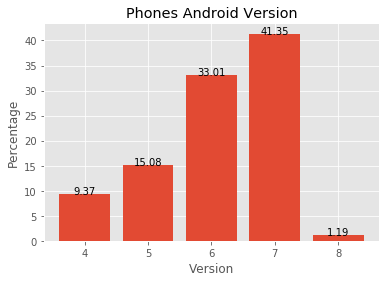

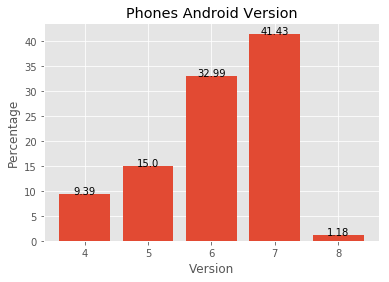

In [5]:
def getVersionCounter(all_versions_counts):
    version_counts = dict()
    
    for index_val, series_val in all_versions_counts.iteritems():
        if index_val[0] in version_counts:
            version_counts[index_val[0]] += series_val
        else:
            version_counts[index_val[0]] = series_val
    
    return version_counts

def computeVersionPercentageDevices(devices_table):
    all_versions_percentage = devices_table['os_version'].value_counts(normalize=True) #get all version percentage
    version_percentage = getVersionCounter(all_versions_percentage) #join all versions

    keys, values = zip(*version_percentage.items()) #gets 2 lists one with keys another with values od dictionary
    values = [x * 100 for x in values] #convert to percentage (int)
    plt.bar(keys, values, align='center')
    plt.title('Phones Android Version')
    plt.xlabel('Version')
    plt.ylabel('Percentage')
    for a, b in zip(keys, values):
        plt.text(a, b, str(round(b, 2)), ha='center')
    plt.show()
    
computeVersionPercentageDevices(devices_old)
computeVersionPercentageDevices(devices_new)

In [9]:
def getCountDevicesVersion(devices_table, version):
    dev_count = 0
    
    for index, row in devices_table.iterrows():
        if int(row['os_version'][0]) == version:
            dev_count += 1
    
    return dev_count

old_count = getCountDevicesVersion(devices_old, 4)
new_count = getCountDevicesVersion(devices_new, 4)
print('Number of devices in old daaset =', old_count)
print('Number of devices in new daaset =', new_count)
print('Diference =', new_count - old_count)






# def computeCountDevices(devices_table):
#     devices_id = []
#     for index, row in devices_new.iterrows():
#         if int(row['os_version'][0]) == 4:
#             devices_id.append(index)
        
# len(devices_id)

# df = devices_new.loc[devices_id]
# df.head()


Number of devices in old daaset = 292
Number of devices in new daaset = 295
Deference = 3


In [14]:
def getDevicesIdsListOfGivenVersion(devices_table, version):
    dev_ids = []
    
    for index, row in devices_table.iterrows():
        if int(row['os_version'][0]) == version:
            dev_ids.append(index)
    
    return dev_ids

def computeInstalationsPerYear(devices_table, version):
    new_version_devices_table = devices_new.loc[getDevicesIdsListOfGivenVersion(devices_new, 4)]
    
    print('Installations in 2017 =', len(new_version_devices_table[new_version_devices_table['created_at'] < '2018-1-1']))
    print('Installations in 2018 =', len(new_version_devices_table[new_version_devices_table['created_at'] >= '2018-1-1']))

computeInstalationsPerYear(devices_new, 4)



Installations in 2017 = 260
Installations in 2018 = 35


In [19]:
def getDevicesIdsListOfGivenVersion(devices_table, version):
    dev_ids = []
    
    for index, row in devices_table.iterrows():
        if int(row['os_version'][0]) == version:
            dev_ids.append(index)
    
    return dev_ids

#table with only devices of version 4
new_version_devices_table = devices_new.loc[getDevicesIdsListOfGivenVersion(devices_new, 4)]

last_year_devices = list(new_version_devices_table[new_version_devices_table['created_at'] < '2018-1-1'].index)
this_year_devices = list(new_version_devices_table[new_version_devices_table['created_at'] >= '2018-1-1'].index)

last_year_no_samples = 0
for i in last_year_devices:
    if len(samples[samples['device_id'] == i]) == 0:
        last_year_no_samples += 1
        
this_year_no_samples = 0    
for i in this_year_devices:
    if len(samples[samples['device_id'] == i]) == 0:
        this_year_no_samples += 1
        
print('Number of devices of 2017 with no samples =', last_year_no_samples)
print('Number of devices of 2018 with no samples =', this_year_no_samples)


Number of devices of 2017 with no samples = 58
Number of devices of 2018 with no samples = 10


In [23]:
samples['timestamp'][0].year
    

2017

In [27]:
new_version_devices_table = devices_new.loc[getDevicesIdsListOfGivenVersion(devices_new, 4)]

last_year_devices = list(new_version_devices_table[new_version_devices_table['created_at'] < '2018-1-1'].index)


number_devices_with_no_samples_this_year = 0

for i in last_year_devices:
    dev_samples = samples[samples['device_id'] == i].sort_values(by='timestamp')
    
    if len(dev_samples != 0):
        if dev_samples.iloc[len(dev_samples) - 1].timestamp.year < 2018:
            number_devices_with_no_samples_this_year += 1


print('Devices of 2017 with no samples in 2018 =', number_devices_with_no_samples_this_year)

    



Devices of 2017 with no samples in 2018 = 180
